In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

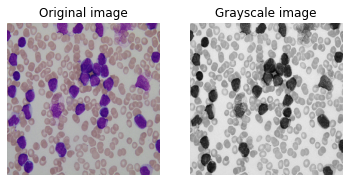

In [2]:
a = cv2.imread('E:/Aashka/College/SEM5/IP/Mini Project/dataset/bloodimg5.jpg')
a = cv2.resize(a,(256,256))
img1 = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
imgcopy = img1.copy()
#cv2.imshow('gray image',img1)
fig, (a1,a2) = plt.subplots(1,2)
a1.imshow(img1)
a1.set_title('Original image')
a1.axis('off')
a2.imshow(img, cmap="gray")
a2.set_title('Grayscale image')
a2.axis('off')
plt.show()


Preprocessing

In [5]:
#Contrast stretching
def contrastStretching(img,r1,r2,a,b,c):
    s1 = a*r1
    s2 = b*(r2-r1)+s1
    imgC = np.zeros((256,256), dtype=np.int32)
    for i in range(0,256):
        for j in range(0,256):
            r = img[i,j]
            if r<r1:
                imgC[i,j] = a*r
            elif r>r1 and r<r2:
                imgC[i,j] = b*(r-r1) +s1
            else: 
                imgC[i,j] = c*(r-r2) + s2

    imgC = imgC.astype(np.uint8)
    return imgC

(-0.5, 255.5, 255.5, -0.5)

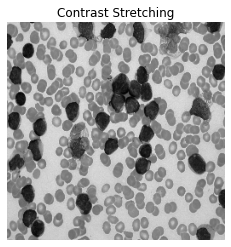

In [7]:
img2 = contrastStretching(img, 20, 150, 0.1, 1, 2)
#plt.imshow(imgfinal, cmap = "gray")
plt.imshow(img2, cmap = "gray")
plt.title('Contrast Stretching')
plt.axis('off')

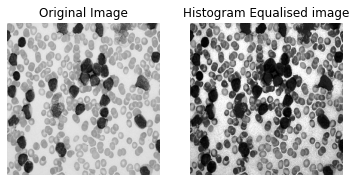

In [8]:
#Histogram Equalisation
a = np.zeros((256,),dtype=np.float16)
b = np.zeros((256,),dtype=np.float16)
imghist = img

height,width=img.shape

#finding histogram
for i in range(width):
    for j in range(height):
        g = imghist[j,i]
        a[g] = a[g]+1

#print(a)   

#performing histogram equalization
tmp = 1.0/(height*width)
b = np.zeros((256,),dtype=np.float16)

for i in range(256):
    for j in range(i+1):
        b[i] += a[j] * tmp
    b[i] = round(b[i] * 255)

# b now contains the equalized histogram
b=b.astype(np.uint8)

#print(b)

#Re-map values from equalized histogram into the image
for i in range(width):
    for j in range(height):
        g = imghist[j,i]
        imghist[j,i]= b[g]

imghist = imghist.astype(np.uint8)
img = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
fig, (a1,a2) = plt.subplots(1,2)
a1.imshow(img, cmap='gray')
a1.set_title('Original Image')
a1.axis('off')
a2.imshow(imghist, cmap='gray')
a2.set_title('Histogram Equalised image')
a2.axis('off')
plt.show()


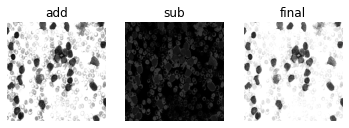

In [9]:
img2 = img2.astype(np.float16)
imghist = imghist.astype(np.float16)

imgadd = img2 + imghist
imgsub = img2 - imghist

for i in range(0,256):
    for j in range(0,256):
        if imgadd[i,j] >255:
            imgadd[i,j]=255
        if imgsub[i,j] <0:
            imgsub[i,j] = 0
imgfinal= imgadd + imgsub
for i in range(0,256):
    for j in range(0,256):
        if imgfinal[i,j] >255:
            imgfinal[i,j]=255
imgfinal = imgfinal.astype(np.uint8)
imgadd = imgadd.astype(np.uint8)
imgsub = imgsub.astype(np.uint8)
fig, (a1,a2,a3) = plt.subplots(1,3)
a1.imshow(imgadd, cmap="gray")
a1.set_title('add')
a1.axis('off')
a2.imshow(imgsub, cmap="gray", vmin=0, vmax=255)
a2.set_title('sub')
a2.axis('off')
a3.imshow(imgfinal, cmap="gray", vmin=0, vmax=255)
a3.set_title('final')
a3.axis('off')
plt.show()

Thresholding, Morphological Operations and Segmentation

In [10]:
def thresholding(img,t):
    for i in range(0,256):
        for j in range(0,256):
            if img[i,j]>t:
                img[i,j] =0
            else:
                img[i,j] = 255
    return img

In [11]:
def dilation(img,mask):
    img = img.astype(np.float16)
    dilimg = np.zeros((256,256), dtype=np.float16)
    for i in range(1,255):
        for j in range(1,255):
            imgtemp = img[i-1:i+2, j-1:j+2]
            res = np.multiply(imgtemp,mask)
            dilimg[i,j] = np.amax(res)
    dilimg = dilimg.astype(np.uint8)
    return dilimg

def erosion(img,mask):
    img = img.astype(np.float16)
    eroimg = np.zeros((256,256), dtype=np.float16)
    for i in range(1,255):
        for j in range(1,255):
            imgtemp = img[i-1:i+2, j-1:j+2]
            res=[]
            for k in range(0,3):
                for m in range(0,3):
                    if mask[k][m] ==1:
                        a = imgtemp[k,m]
                        res.append(a)
            eroimg[i,j] = np.amin(res)
    eroimg = eroimg.astype(np.uint8)
    return eroimg


(-0.5, 255.5, 255.5, -0.5)

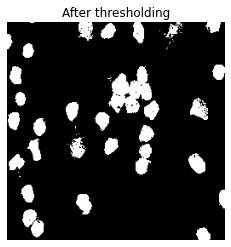

In [12]:
imgthresh = thresholding(imgfinal, 150)
plt.imshow(imgthresh, cmap="gray")
plt.title('thresholded image')
plt.title('After thresholding')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

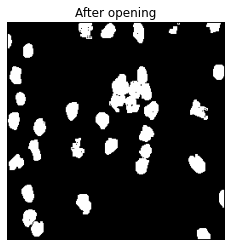

In [13]:
mask = [[1,1,1],
        [1,0,1],
        [1,1,1]]
erodedimg = erosion(imgthresh,mask)
openedimg = dilation(erodedimg,mask)
plt.imshow(openedimg, cmap="gray")
plt.title('After opening')
plt.axis('off')

In [14]:
#Segmentation
def edgeDetection(img):
    imgS = img.astype(np.float16)
    sobx=[[-1, -2, -1],
          [0, 0, 0],
          [1, 2, 1]]
    sobx = np.array(sobx, np.float16)
    soby =[[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]]
    soby = np.array(soby,np.float16)
    for i in range(1,254):
        for j in range(1,254):
            imgtemp = img[i-1:i+2, j-1:j+2]
            x = np.sum(np.multiply(sobx,imgtemp))
            y = np.sum(np.multiply(soby,imgtemp))
            pixvalue = np.sqrt(x**2 + y**2)
            imgS[i,j] = pixvalue
    imgS = imgS.astype(np.uint8)
    return imgS

Text(0.5, 1.0, 'After Edge Detection')

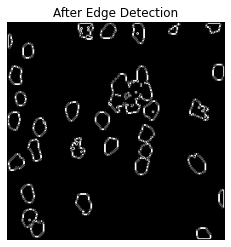

In [15]:
imgEdges = edgeDetection(openedimg)
plt.imshow(imgEdges, cmap="gray")
plt.axis('off')
plt.title('After Edge Detection')

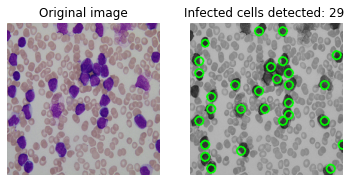

In [20]:
imgcircle = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
detected_circles = cv2.HoughCircles(openedimg,  
                    cv2.HOUGH_GRADIENT, 10, minDist= 10, param2= 30, minRadius = 1, maxRadius = 13) 
ctr=0
if detected_circles is not None: 
    
        # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
        
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] #a,b are the coordinates of the center and r is the radius

        # Draw the circumference of the circle. 
        imgcirclefinal = cv2.circle(imgcircle, (a, b), r, (0, 255, 0), 2) 

        # Draw a small circle (of radius 1) to show the center. 
        #cv2.circle(img1, (a, b), 1, (255, 0, 0), 3) 
        ctr+=1 
fig, (a1,a2) = plt.subplots(1,2)
a1.imshow(imgcopy)
a1.set_title('Original image')
a1.axis('off')
a2.imshow(imgcirclefinal)
a2.set_title('Infected cells detected: {} '.format(ctr))
a2.axis('off')
plt.show()


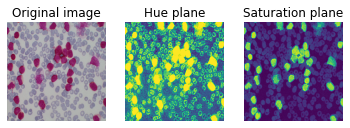

In [64]:
hsv = cv2.cvtColor(a,cv2.COLOR_BGR2HSV)
s = hsv[:, :, 1]
h = hsv[:, :, 0]
img = cv2.add(h,s)
#cv2.imshow('gray image',img1)
fig, (a1,a2,a3) = plt.subplots(1,3)
a1.imshow(a)
a1.set_title('Original image')
a1.axis('off')
a2.imshow(img)
a2.set_title('Hue plane')
a2.axis('off')
a3.imshow(s)
a3.set_title('Saturation plane')
a3.axis('off')
plt.show()

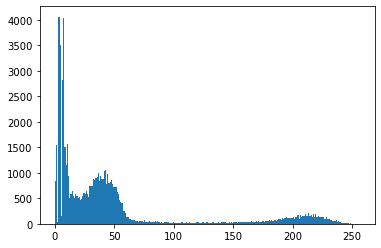

In [26]:

plt.hist(s.ravel(),256,[0,256]); plt.show()

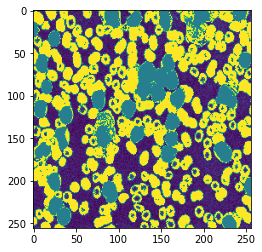

In [65]:
for i in range(0,256):
    for j in range(0,256):
        if s[i][j]>20 and s[i][j]<70:
            s[i][j]=70
        elif s[i][j]>70:
            s[i][j]=30
plt.imshow(s)